<a href="https://colab.research.google.com/github/lmcanavals/ml/blob/main/1202_save_model_to_drive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Saving a model

In [6]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

In [3]:
t, v = fashion_mnist.load_data()
x_train, y_train = t
x_test, y_test = v

4422102/4422102 [==============================] - 0s 0us/step


In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

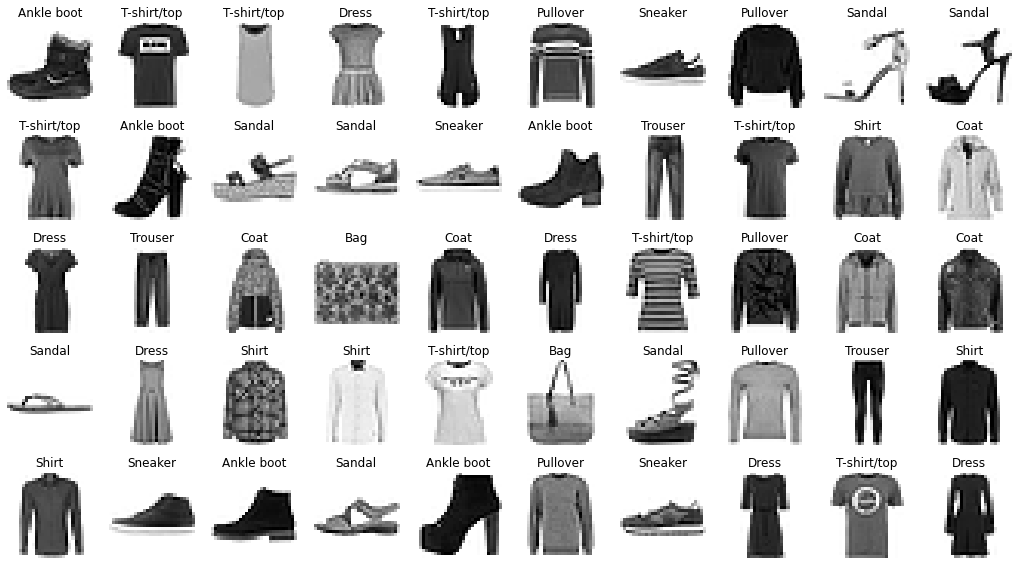

In [11]:
fig = plt.figure(figsize=(18, 10))
for i, im in enumerate(x_train[:50]):
    a = fig.add_subplot(5, 10, i + 1)
    plt.axis("off")
    plt.imshow(im, cmap='gray_r')
    plt.title(class_names[y_train[i]])

plt.show()

In [5]:
x_train = x_train / 255.
x_test = x_test / 255.

In [23]:
model = keras.models.Sequential()
model.add(Flatten(input_shape=[28, 28]))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_13 (Dense)            (None, 256)               200960    
                                                                 
 dropout_10 (Dropout)        (None, 256)               0         
                                                                 
 dense_14 (Dense)            (None, 128)               32896     
                                                                 
 dropout_11 (Dropout)        (None, 128)               0         
                                                                 
 dense_15 (Dense)            (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-tr

In [24]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6916 - sparse_categorical_accuracy: 0.7498
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5135 - sparse_categorical_accuracy: 0.8197
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4743 - sparse_categorical_accuracy: 0.8300
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4509 - sparse_categorical_accuracy: 0.8386
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4376 - sparse_categorical_accuracy: 0.8432


In [25]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3846 - sparse_categorical_accuracy: 0.8585


[0.38459286093711853, 0.8585000038146973]

In [26]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [27]:
model.save("/gdrive/MyDrive/fmnist.h5")